# <center>Самостійна робота №3
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів 

### <center>1.Підготовка навчальної вибірки(-)
    

In [1]:
# Для роботи з даними
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Для роботи з Keras
from tensorflow.keras.models import Sequential # модель прямого розповсюдження
from tensorflow.keras.layers import Dense # повнозв'язні прошарки

data = pd.read_csv("E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр2/my/fetal_health_b.csv - fetal_health_b.csv.csv", sep=",")

Дізнаємось кількість пропущених значень для кожної характеристики:

In [3]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Оскільки пропущених значень немає, продовжимо роботу по оптиміззації.

### <center>2.Балансування вибірки(+)

In [4]:
data['fetal_health'].value_counts()

2.0    1770
1.0    1655
3.0    1408
Name: fetal_health, dtype: int64

In [5]:
data['fetal_health'].value_counts(normalize=True).sort_values(ascending=False)

2.0    0.366232
1.0    0.342437
3.0    0.291330
Name: fetal_health, dtype: float64

Можна побачити, що у 3 класі зразків приблизно менше на 200 одиниць. Отже, проведемо балансування зразків за допомогою підходу "undersampling" 

In [2]:
class1 = data[data['fetal_health']==1].sample(n=1450)
class2 = data[data['fetal_health']==2].sample(n=1450)
class3 = data[data['fetal_health']==3]

balanced_data = pd.concat([class1,class2,class3])
balanced_data['fetal_health'].value_counts(normalize=True)

1.0    0.336583
2.0    0.336583
3.0    0.326834
Name: fetal_health, dtype: float64

Отже, тепер кількість зразків в 3 класах є приблизно збалансованою.

### <center>3.Факторизація(-)

Характеристики об'єктів знаходяться у форматі float64, і характеристик у вигляді тексту немає. Отже факторизацію даних проводити не потрібно.

Оскільки класи збалансовані, проведемо навчання у звичному форматі.

In [3]:
X = balanced_data.drop('fetal_health', axis = 1)
Y = pd.get_dummies(balanced_data.fetal_health, prefix='Fetal Health')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16, verbose=2)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 - 0s - loss: 0.9291 - accuracy: 0.6284 - val_loss: 0.7421 - val_accuracy: 0.7364
Epoch 2/50
195/195 - 0s - loss: 0.6318 - accuracy: 0.7740 - val_loss: 0.5740 - val_accuracy: 0.7782
Epoch 3/50
195/195 - 0s - loss: 0.5049 - accuracy: 0.7994 - val_loss: 0.4963 - val_accuracy: 0.7927
Epoch 4/50
195/195 - 0s - loss: 0.4441 - accuracy: 0.8174 - val_loss: 0.4519 - val_accuracy: 0.7964
Epoch 5/50
195/195 - 0s - loss: 0.4079 - accuracy: 0.8255 - val_loss: 0.4245 - val_accuracy: 0.8145
Epoch 6/50
195/195 - 0s - loss: 0.3820 - accuracy: 0.8300 - val_loss: 0.4078 - val_accuracy: 0.8145
Epoch 7/50
195/195 - 0s - loss: 0.3622 - accuracy: 0.8422 - val_loss: 0.3826 - val_accuracy: 0.8382
Epoch 8/50
195/195 - 0s - loss: 0.3454 - accuracy: 0.8615 - val_loss: 0.3648 - val_accuracy: 0.8491
Epoch 9/50
195/195 - 0s - loss: 0.3290 - accuracy: 0.8705 - val_loss: 0.3537 - val_accuracy: 0.8491
Epoch 10/50
195/195 - 0s - loss: 0.3135 - accuracy: 0.8769 - val_loss: 0.3264 - val_accuracy: 0.8836

Отже бачимо, що при збалансованих класах доля правильних відповідей має значення 93.6%

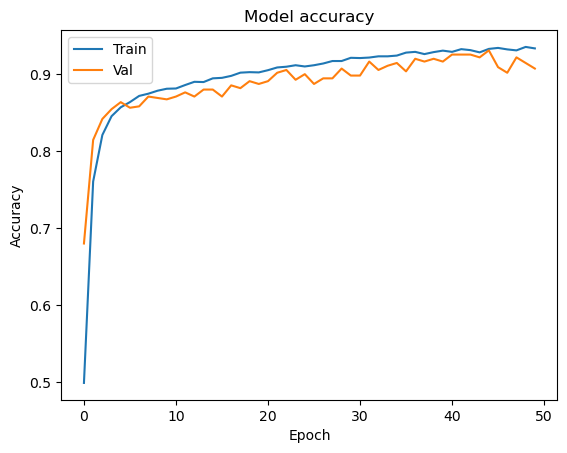

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Accuracy на тестовій множині склала 93.6%.Спробуємо застосувати різні підходи до регуляризації для виправлення даної ситуації і покращення якості роботи мережі.

### <center>4.Дострокова зупинка навчання (early stopping)(+)

In [13]:
import tensorflow as tf
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [14]:
model2 = Sequential()
model2.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
model2.add(Dense(5, activation="relu"))
model2.add(Dense(3, activation="softmax"))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history2 = model2.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16, callbacks=[early]) 

loss, accuracy = model2.evaluate(X_test, Y_test, verbose=0)
print(loss, accuracy)

Epoch 1/50
195/195 [==============================] - 0s 2ms/step - loss: 1.1277 - accuracy: 0.4815 - val_loss: 0.8962 - val_accuracy: 0.6782
Epoch 2/50
195/195 [==============================] - 0s 761us/step - loss: 0.7359 - accuracy: 0.7403 - val_loss: 0.5785 - val_accuracy: 0.7964
Epoch 3/50
195/195 [==============================] - 0s 687us/step - loss: 0.5278 - accuracy: 0.8004 - val_loss: 0.4803 - val_accuracy: 0.8182
Epoch 4/50
195/195 [==============================] - 0s 653us/step - loss: 0.4527 - accuracy: 0.8174 - val_loss: 0.4328 - val_accuracy: 0.8273
Epoch 5/50
195/195 [==============================] - 0s 667us/step - loss: 0.4068 - accuracy: 0.8293 - val_loss: 0.3967 - val_accuracy: 0.8364
Epoch 6/50
195/195 [==============================] - 0s 773us/step - loss: 0.3689 - accuracy: 0.8473 - val_loss: 0.3675 - val_accuracy: 0.8691
Epoch 7/50
195/195 [==============================] - 0s 654us/step - loss: 0.3424 - accuracy: 0.8599 - val_loss: 0.3504 - val_accuracy: 0

Як ми бачимо, навчання прервалось на 29 епосі. Доля правильних відповідей склала 90.5%

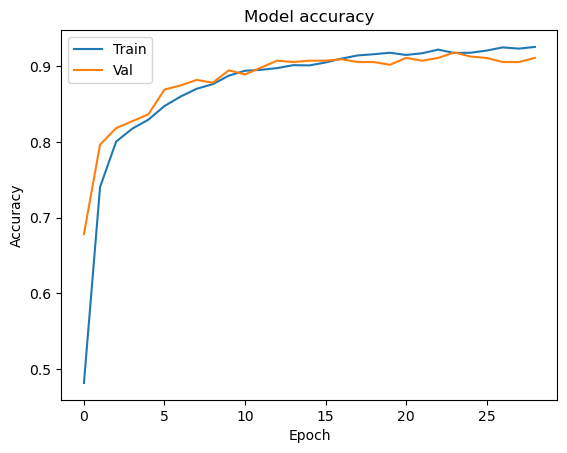

In [16]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Перенавчання немає


### <center>5.Оптимізація архітектури(+)

Приберемо 2 прошарок, та зменшимо кількість нейронів у першому.

In [17]:
model3 = Sequential()
model3.add(Dense(6, input_dim=X_train.shape[1], activation="relu"))
model3.add(Dense(3, activation="softmax"))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history3 = model3.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, accuracy = model3.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 1ms/step - loss: 1.0681 - accuracy: 0.4539 - val_loss: 0.8756 - val_accuracy: 0.6982
Epoch 2/50
195/195 [==============================] - 0s 655us/step - loss: 0.7422 - accuracy: 0.7592 - val_loss: 0.6325 - val_accuracy: 0.7727
Epoch 3/50
195/195 [==============================] - 0s 608us/step - loss: 0.5509 - accuracy: 0.8078 - val_loss: 0.5066 - val_accuracy: 0.8255
Epoch 4/50
195/195 [==============================] - 0s 584us/step - loss: 0.4628 - accuracy: 0.8303 - val_loss: 0.4540 - val_accuracy: 0.8255
Epoch 5/50
195/195 [==============================] - 0s 701us/step - loss: 0.4208 - accuracy: 0.8386 - val_loss: 0.4245 - val_accuracy: 0.8509
Epoch 6/50
195/195 [==============================] - 0s 620us/step - loss: 0.3928 - accuracy: 0.8554 - val_loss: 0.4049 - val_accuracy: 0.8600
Epoch 7/50
195/195 [==============================] - 0s 635us/step - loss: 0.3724 - accuracy: 0.8634 - val_loss: 0.3890 - val_accuracy: 0

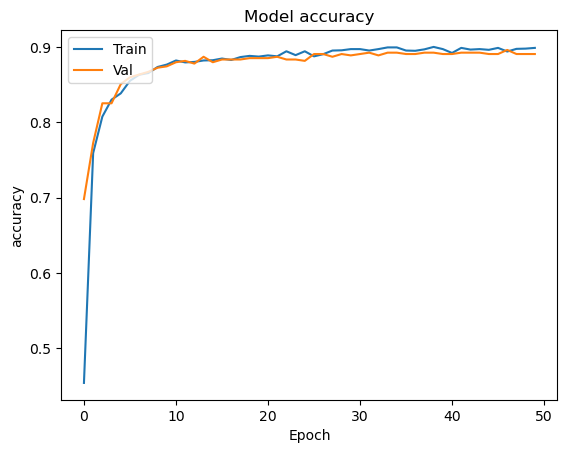

In [19]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Отже, доля правильних відповідей становить 90.1%. Перенавчання немає.

### <center>6.Batch normalization(+)

In [20]:
from tensorflow.keras.layers import BatchNormalization

model4 = Sequential()
model4.add(Dense(6, input_dim=X_train.shape[1], activation="relu"))
model4.add(BatchNormalization())
model4.add(Dense(3, activation="softmax"))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, accuracy = model4.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 1ms/step - loss: 0.9038 - accuracy: 0.5908 - val_loss: 0.7242 - val_accuracy: 0.7364
Epoch 2/50
195/195 [==============================] - 0s 880us/step - loss: 0.6530 - accuracy: 0.7454 - val_loss: 0.5618 - val_accuracy: 0.8200
Epoch 3/50
195/195 [==============================] - 0s 844us/step - loss: 0.5529 - accuracy: 0.7946 - val_loss: 0.4778 - val_accuracy: 0.8564
Epoch 4/50
195/195 [==============================] - 0s 783us/step - loss: 0.5108 - accuracy: 0.8075 - val_loss: 0.4334 - val_accuracy: 0.8600
Epoch 5/50
195/195 [==============================] - 0s 711us/step - loss: 0.4689 - accuracy: 0.8187 - val_loss: 0.4032 - val_accuracy: 0.8745
Epoch 6/50
195/195 [==============================] - 0s 726us/step - loss: 0.4419 - accuracy: 0.8293 - val_loss: 0.3823 - val_accuracy: 0.8764
Epoch 7/50
195/195 [==============================] - 0s 710us/step - loss: 0.4454 - accuracy: 0.8210 - val_loss: 0.3696 - val_accuracy: 0

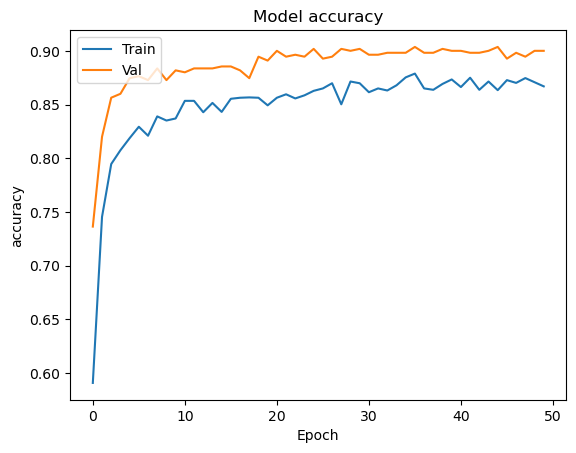

In [21]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 90.2%. Перенавчання немає.

### <center>7.Dropout(-)

In [23]:
from tensorflow.keras.layers import Dropout

model5 = Sequential()
model5.add(Dense(6, input_dim=X_train.shape[1], activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(3, activation="softmax"))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history5 = model5.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, accuracy = model5.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 1ms/step - loss: 0.9566 - accuracy: 0.5416 - val_loss: 0.7799 - val_accuracy: 0.7473
Epoch 2/50
195/195 [==============================] - 0s 667us/step - loss: 0.7554 - accuracy: 0.7171 - val_loss: 0.6315 - val_accuracy: 0.8127
Epoch 3/50
195/195 [==============================] - 0s 664us/step - loss: 0.6568 - accuracy: 0.7506 - val_loss: 0.5560 - val_accuracy: 0.8345
Epoch 4/50
195/195 [==============================] - 0s 615us/step - loss: 0.6045 - accuracy: 0.7698 - val_loss: 0.5148 - val_accuracy: 0.8400
Epoch 5/50
195/195 [==============================] - 0s 622us/step - loss: 0.5915 - accuracy: 0.7657 - val_loss: 0.4885 - val_accuracy: 0.8473
Epoch 6/50
195/195 [==============================] - 0s 554us/step - loss: 0.5473 - accuracy: 0.7824 - val_loss: 0.4628 - val_accuracy: 0.8436
Epoch 7/50
195/195 [==============================] - 0s 634us/step - loss: 0.5241 - accuracy: 0.7817 - val_loss: 0.4489 - val_accuracy: 0

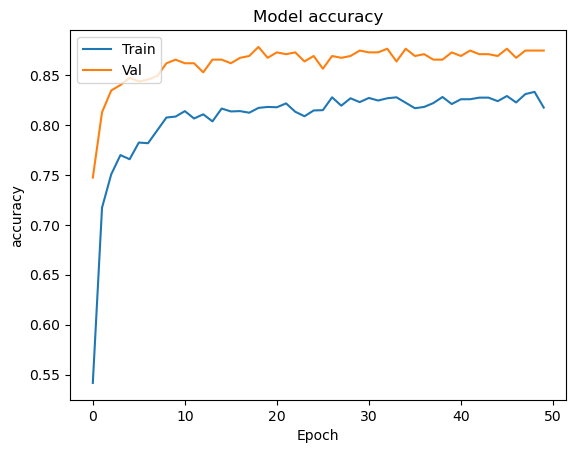

In [24]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 88.8%. Перенавчання немає.

### <center>8.Регуляризація ваг (weight regularizers)(-)

In [25]:
model6 = Sequential()
model6.add(Dense(6, input_dim=X_train.shape[1], activation="relu", kernel_regularizer='l2'))
model6.add(Dense(3, activation="softmax", kernel_regularizer='l2'))

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history6 = model6.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, accuracy = model6.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 1ms/step - loss: 1.2935 - accuracy: 0.3922 - val_loss: 0.9578 - val_accuracy: 0.6891
Epoch 2/50
195/195 [==============================] - 0s 699us/step - loss: 0.8212 - accuracy: 0.7583 - val_loss: 0.7146 - val_accuracy: 0.8018
Epoch 3/50
195/195 [==============================] - 0s 684us/step - loss: 0.6668 - accuracy: 0.8104 - val_loss: 0.6292 - val_accuracy: 0.8236
Epoch 4/50
195/195 [==============================] - 0s 657us/step - loss: 0.6039 - accuracy: 0.8251 - val_loss: 0.5860 - val_accuracy: 0.8309
Epoch 5/50
195/195 [==============================] - 0s 652us/step - loss: 0.5677 - accuracy: 0.8255 - val_loss: 0.5607 - val_accuracy: 0.8382
Epoch 6/50
195/195 [==============================] - 0s 565us/step - loss: 0.5432 - accuracy: 0.8383 - val_loss: 0.5411 - val_accuracy: 0.8527
Epoch 7/50
195/195 [==============================] - 0s 645us/step - loss: 0.5244 - accuracy: 0.8473 - val_loss: 0.5247 - val_accuracy: 0

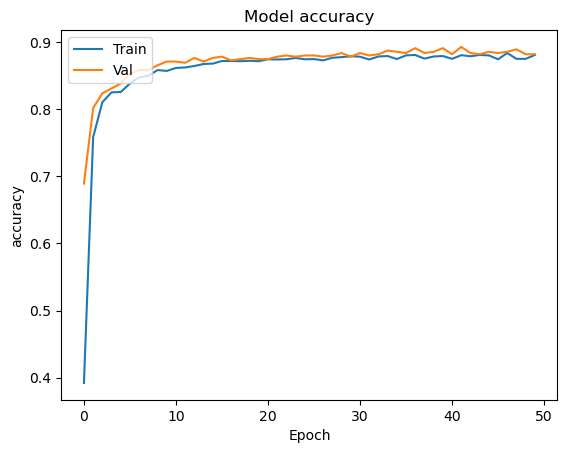

In [26]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 88.1%. Перенавчання немає.

### <center>9.Підбір оптимальних критеріїв якості та метрик(-)

In [27]:
model7 = Sequential()
model7.add(Dense(6, input_dim=X_train.shape[1], activation="relu"))
model7.add(Dense(3, activation="softmax"))

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

history7 = model7.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, categ_accuracy = model7.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 1ms/step - loss: 0.9164 - categorical_accuracy: 0.6226 - val_loss: 0.6675 - val_categorical_accuracy: 0.7873
Epoch 2/50
195/195 [==============================] - 0s 657us/step - loss: 0.6099 - categorical_accuracy: 0.7972 - val_loss: 0.5272 - val_categorical_accuracy: 0.8218
Epoch 3/50
195/195 [==============================] - 0s 616us/step - loss: 0.5107 - categorical_accuracy: 0.8216 - val_loss: 0.4732 - val_categorical_accuracy: 0.8327
Epoch 4/50
195/195 [==============================] - 0s 648us/step - loss: 0.4631 - categorical_accuracy: 0.8258 - val_loss: 0.4422 - val_categorical_accuracy: 0.8436
Epoch 5/50
195/195 [==============================] - 0s 679us/step - loss: 0.4332 - categorical_accuracy: 0.8335 - val_loss: 0.4232 - val_categorical_accuracy: 0.8455
Epoch 6/50
195/195 [==============================] - 0s 685us/step - loss: 0.4129 - categorical_accuracy: 0.8393 - val_loss: 0.4057 - val_categorical_accuracy: 0

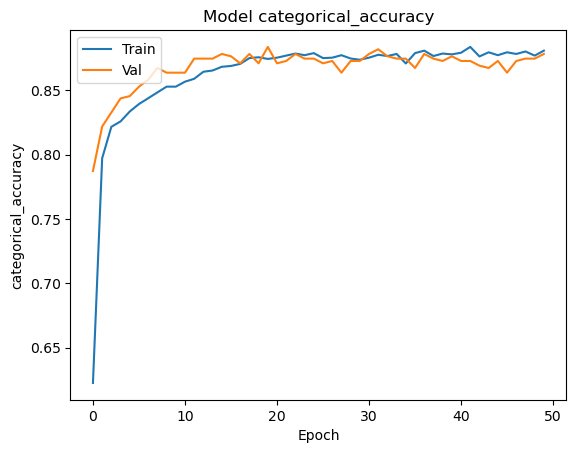

In [28]:
plt.plot(history7.history['categorical_accuracy'])
plt.plot(history7.history['val_categorical_accuracy'])
plt.title('Model categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Значення категоріальної долі правильних відповідей склало 88,1% на тестовій множині. Перенавчання немає

### <center>10.Підбір характеристик оптимізаторів(+)

Створимо оптимізатор Адам:

In [29]:
from tensorflow.keras import optimizers

my_adam = optimizers.Adam(learning_rate=0.01)

model8 = Sequential()
model8.add(Dense(6, input_dim=X_train.shape[1], activation="relu"))
model8.add(Dense(3, activation="softmax"))

model8.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

history8 = model8.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, accuracy = model8.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7850 - val_loss: 0.3703 - val_accuracy: 0.8582
Epoch 2/50
195/195 [==============================] - 0s 620us/step - loss: 0.3392 - accuracy: 0.8672 - val_loss: 0.3249 - val_accuracy: 0.8691
Epoch 3/50
195/195 [==============================] - 0s 647us/step - loss: 0.3085 - accuracy: 0.8756 - val_loss: 0.3136 - val_accuracy: 0.8800
Epoch 4/50
195/195 [==============================] - 0s 533us/step - loss: 0.2937 - accuracy: 0.8817 - val_loss: 0.3063 - val_accuracy: 0.8873
Epoch 5/50
195/195 [==============================] - 0s 648us/step - loss: 0.2830 - accuracy: 0.8849 - val_loss: 0.3310 - val_accuracy: 0.8727
Epoch 6/50
195/195 [==============================] - 0s 539us/step - loss: 0.2787 - accuracy: 0.8843 - val_loss: 0.3054 - val_accuracy: 0.8764
Epoch 7/50
195/195 [==============================] - 0s 610us/step - loss: 0.2651 - accuracy: 0.8955 - val_loss: 0.2825 - val_accuracy: 0

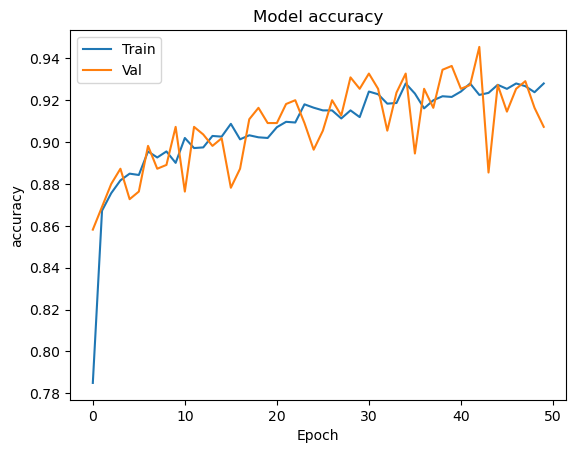

In [30]:
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 92.1%. Перенавчання немає.

Створимо оптимізатор градієнтового спуску:

In [31]:
from tensorflow.keras import optimizers

my_SGD = optimizers.SGD(learning_rate=0.001, momentum=0.8, nesterov=True)

model9 = Sequential()
model9.add(Dense(6, input_dim=X_train.shape[1], activation="relu"))
model9.add(Dense(3, activation="softmax"))

model9.compile(optimizer=my_SGD, loss='categorical_crossentropy', metrics=['accuracy'])

history9 = model9.fit(X_train, Y_train, epochs=100, validation_split=0.15, batch_size=16) 

loss, accuracy = model9.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/100
195/195 [==============================] - 0s 1ms/step - loss: 1.2353 - accuracy: 0.3523 - val_loss: 1.0605 - val_accuracy: 0.4327
Epoch 2/100
195/195 [==============================] - 0s 663us/step - loss: 0.9967 - accuracy: 0.5140 - val_loss: 0.9529 - val_accuracy: 0.6036
Epoch 3/100
195/195 [==============================] - 0s 578us/step - loss: 0.9114 - accuracy: 0.6336 - val_loss: 0.8842 - val_accuracy: 0.6745
Epoch 4/100
195/195 [==============================] - 0s 583us/step - loss: 0.8460 - accuracy: 0.6876 - val_loss: 0.8264 - val_accuracy: 0.7091
Epoch 5/100
195/195 [==============================] - 0s 569us/step - loss: 0.7905 - accuracy: 0.7274 - val_loss: 0.7765 - val_accuracy: 0.7327
Epoch 6/100
195/195 [==============================] - 0s 611us/step - loss: 0.7412 - accuracy: 0.7512 - val_loss: 0.7306 - val_accuracy: 0.7545
Epoch 7/100
195/195 [==============================] - 0s 574us/step - loss: 0.6949 - accuracy: 0.7788 - val_loss: 0.6867 - val_accu

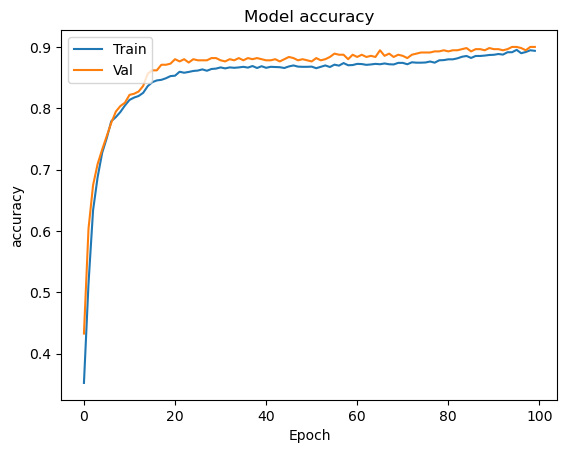

In [32]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 89.6%. Перенавчання немає. Показники якості при оптимізаторі градієнтового спуску суттєво не покращились, отже, залишимо Адам.

### <center>11.Підбір характеристик ініціалізації ваг (weight initializers)(+)

In [33]:
from tensorflow.keras import initializers

init = initializers.TruncatedNormal(mean=0., stddev=0.05, seed=12345)
init_b = initializers.Constant(1e-3)

model10 = Sequential()
model10.add(Dense(6, input_dim=X_train.shape[1], activation="relu", kernel_initializer=init, bias_initializer=init_b))
model10.add(Dense(3, activation="softmax", kernel_initializer=init, bias_initializer=init_b))

model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history10 = model10.fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16) 

loss, accuracy = model10.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/50
195/195 [==============================] - 0s 2ms/step - loss: 0.9332 - accuracy: 0.6635 - val_loss: 0.7273 - val_accuracy: 0.7491
Epoch 2/50
195/195 [==============================] - 0s 684us/step - loss: 0.6010 - accuracy: 0.7885 - val_loss: 0.5142 - val_accuracy: 0.8218
Epoch 3/50
195/195 [==============================] - 0s 630us/step - loss: 0.4679 - accuracy: 0.8271 - val_loss: 0.4382 - val_accuracy: 0.8455
Epoch 4/50
195/195 [==============================] - 0s 638us/step - loss: 0.4141 - accuracy: 0.8428 - val_loss: 0.4036 - val_accuracy: 0.8455
Epoch 5/50
195/195 [==============================] - 0s 648us/step - loss: 0.3854 - accuracy: 0.8489 - val_loss: 0.3819 - val_accuracy: 0.8600
Epoch 6/50
195/195 [==============================] - 0s 538us/step - loss: 0.3650 - accuracy: 0.8573 - val_loss: 0.3667 - val_accuracy: 0.8764
Epoch 7/50
195/195 [==============================] - 0s 595us/step - loss: 0.3489 - accuracy: 0.8608 - val_loss: 0.3517 - val_accuracy: 0

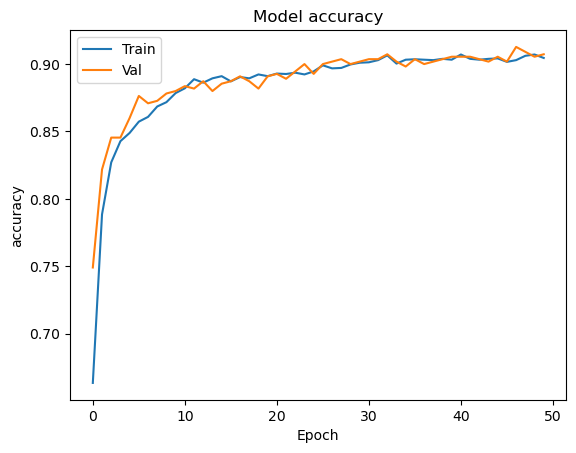

In [34]:
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 90.7%. Перенавчання немає. 

### <center>12.Підсумок

Спробуємо використати різні підходи, методи, параметри, для оптимізації нейронної мережі

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import initializers

early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

init = initializers.TruncatedNormal(mean=0., stddev=0.1, seed=12345)
init_b = initializers.Constant(1e-2)

model11 = Sequential()
model11.add(Dense(12, input_dim=X_train.shape[1], activation="relu", kernel_initializer=init, bias_initializer=init_b))
model11.add(BatchNormalization())
model11.add(Dense(3, activation="softmax", kernel_initializer=init, bias_initializer=init_b))
model11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history11 = model11.fit(X_train, Y_train, epochs=45, validation_split=0.15, batch_size=16, verbose=2) 

loss, accuracy = model11.evaluate(X_test, Y_test, verbose=0)
print("Втрати:", loss)
print("Доля правильних відповідей:", accuracy)

Epoch 1/45
195/195 - 0s - loss: 0.6779 - accuracy: 0.7679 - val_loss: 0.5966 - val_accuracy: 0.8345
Epoch 2/45
195/195 - 0s - loss: 0.4481 - accuracy: 0.8367 - val_loss: 0.3946 - val_accuracy: 0.8582
Epoch 3/45
195/195 - 0s - loss: 0.3824 - accuracy: 0.8531 - val_loss: 0.3428 - val_accuracy: 0.8636
Epoch 4/45
195/195 - 0s - loss: 0.3496 - accuracy: 0.8621 - val_loss: 0.3015 - val_accuracy: 0.8836
Epoch 5/45
195/195 - 0s - loss: 0.3282 - accuracy: 0.8689 - val_loss: 0.2848 - val_accuracy: 0.8927
Epoch 6/45
195/195 - 0s - loss: 0.3277 - accuracy: 0.8679 - val_loss: 0.2723 - val_accuracy: 0.8982
Epoch 7/45
195/195 - 0s - loss: 0.3005 - accuracy: 0.8840 - val_loss: 0.2603 - val_accuracy: 0.8964
Epoch 8/45
195/195 - 0s - loss: 0.3042 - accuracy: 0.8846 - val_loss: 0.2495 - val_accuracy: 0.9073
Epoch 9/45
195/195 - 0s - loss: 0.3077 - accuracy: 0.8766 - val_loss: 0.2441 - val_accuracy: 0.9091
Epoch 10/45
195/195 - 0s - loss: 0.2854 - accuracy: 0.8888 - val_loss: 0.2337 - val_accuracy: 0.9127

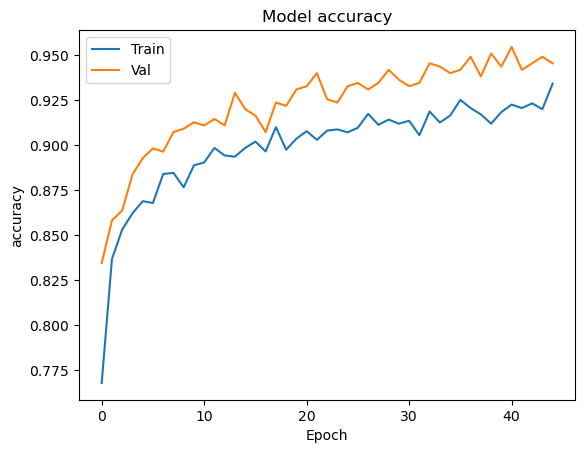

In [41]:
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Доля правильних відповідей у даному випадку рівна 94.59%. Перенавчання немає. 

Отже, в результаті ми отримали показник долі правильних відповідей на тестовій множині у розмірі 94,59%, що є  кращим у порівнянні з початковою моделлю (93,1%). В даному випадку було використано такі підходи: балансування класів, підбір харакетристик ініціалізації ваг, Batch normalization, оптимізація архітектури (зменшення кількості прошарків)

## <center>13.Навчання пакету моделей

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import initializers

# Вказуємо, скільки моделей ми хочемо навчити
NumberOfModels = 10
# Створюємо заготовки для відповідних списків
Model = []
History = []
Loss = []

# Оголошуємо необхідні налаштування
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=7)

init = initializers.TruncatedNormal(mean=0., stddev=0.05, seed=12345)
init_b = initializers.Constant(1e-2)

# Власне цикл
for i in range(NumberOfModels):
    Model.append(Sequential())
    Model[i].add(Dense(12, input_dim=X_train.shape[1], activation="relu", kernel_initializer=init, bias_initializer=init_b))
    Model[i].add(BatchNormalization())
    Model[i].add(Dense(3, activation="softmax", kernel_initializer=init, bias_initializer=init_b))
    Model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    History.append(Model[i].fit(X_train, Y_train, epochs=50, validation_split=0.15, batch_size=16, verbose=2))
    
    Loss.append(Model[i].evaluate(X_test, Y_test, verbose=0))

# Обираємо найкращу модель за показником Accuracy на тестовій множині
best = max([Loss[i][1] for i in range(NumberOfModels)])
print('Best: ', best)

Epoch 1/50
195/195 - 0s - loss: 0.6713 - accuracy: 0.7978 - val_loss: 0.6822 - val_accuracy: 0.8509
Epoch 2/50
195/195 - 0s - loss: 0.4198 - accuracy: 0.8457 - val_loss: 0.4061 - val_accuracy: 0.8709
Epoch 3/50
195/195 - 0s - loss: 0.3771 - accuracy: 0.8560 - val_loss: 0.3219 - val_accuracy: 0.8782
Epoch 4/50
195/195 - 0s - loss: 0.3513 - accuracy: 0.8618 - val_loss: 0.2948 - val_accuracy: 0.8909
Epoch 5/50
195/195 - 0s - loss: 0.3263 - accuracy: 0.8701 - val_loss: 0.2914 - val_accuracy: 0.8818
Epoch 6/50
195/195 - 0s - loss: 0.3169 - accuracy: 0.8775 - val_loss: 0.2975 - val_accuracy: 0.8691
Epoch 7/50
195/195 - 0s - loss: 0.3211 - accuracy: 0.8714 - val_loss: 0.2578 - val_accuracy: 0.9018
Epoch 8/50
195/195 - 0s - loss: 0.2951 - accuracy: 0.8830 - val_loss: 0.2512 - val_accuracy: 0.9091
Epoch 9/50
195/195 - 0s - loss: 0.2899 - accuracy: 0.8856 - val_loss: 0.2428 - val_accuracy: 0.9145
Epoch 10/50
195/195 - 0s - loss: 0.2849 - accuracy: 0.8872 - val_loss: 0.2319 - val_accuracy: 0.9127